# Probably Interesting Data
In order to understand our datasets and pick the best fitting algorithms, we must determine the estimated density. In this notebook, I use two different datasets as well as kmeans and expectation maximization to better derive possibilities. 

#### Data Sets
[Source](https://www.kaggle.com/uciml/datasets)

1. Prima Indians Diabetes
  * Includes nine columns of possible features. Most are continuous but a few discrete variables exist.
2. Iris
  * This....

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pr

In [2]:
# %load ../libraries/kmeans.py
#Assign ALL points to closest centroid     
def assign(data,centroids):
    print("----ASSIGN----")
    #for all points
    for point in data:
        #create an array with all the distances from the point to the centroids
        dist=np.sqrt(np.sum((point[1:]-centroids)**2, axis=1))
        #Grab the centorid that's closest
        cluster=np.argmin(dist)    
        #Record the closest centroid cluster
        point[0]=cluster
    
    
def update(data,centroids):
    print("----UPDATE----")
    change=False
    #Calculate the totals for each different clusters
    for i in range(len(centroids)):
        filtered=data[data[:,0]==i]
        item=np.mean(filtered[:,1:], axis=0)
        #If there was a change
        if not np.array_equal(centroids[int(i)],item) and not np.isnan(item).any():
            centroids[int(i)]=item
            change=True
    #Check if centroid already located in calculated spot
    if change==True:
        return True
    else: #keep going!
        return False

    
def kmean(data, k):
    import random
    #Create column representing clusters to the data
    clusterlist = np.zeros((1,(len(data))))
    newdata=np.append(arr=clusterlist.T,values=data, axis=1)
    
    #Create the list of centroids with random starting locations
    columns=len(data[0])
    cents=k
    centroids = np.random.rand(cents,columns)
       
    #Start assigning the points to clusters
    #Keeps track of when to stop
    changed=True
    while changed==True:
        assign(newdata, centroids)
        changed=update(newdata, centroids)
    
    return (newdata,centroids)
    

In [3]:
#Import dataset
diabetes=pd.read_csv('../data/external/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Due to all of the differing scales and the statistics between k-means, must normalize the interesting data
#Source: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
diabetescol=list(diabetes)
data=diabetes.values
min_max_scaler = pr.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
diabetes = pd.DataFrame(columns=diabetescol,data=x_scaled)

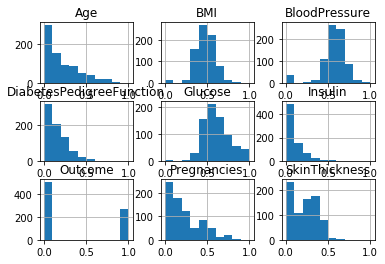

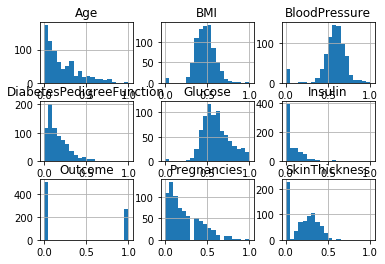

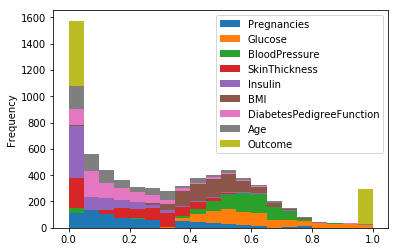

In [15]:
#Implement quick histogram to better understand limit balance
diabetes.hist(bins=10)
diabetes.hist(bins=20)
#focus=diabetes.loc[:,['BMI', 'DiabetesPedigreeFunction','Glucose','BloodPressure']]
diabetes.plot.hist(stacked=True,bins=20)

## Quick Analysis
In these quick binnings, notice the different bins and values. Some values like age, diabetes pedigree function, and pregnancies represent a graduate exponential slope unlike insulin and skin thickness which is a quick drop. In order to represent interesting columns, we can create soft clusters. Interesting features: BMI, Diabetes Pedigree Function and Glucose and Blood Pressure will be viewed. 

In [6]:
checknum=diabetes.values
print(checknum)

[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


In [7]:
k=3
sometup=kmean(checknum, k)

----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----


In [9]:
newcol=['Cluster'] + diabetescol
newdatasets = pd.DataFrame(columns=newcol,data=sometup[0])
newdatasets.head()

,Cluster,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,2.0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,1.0,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,2.0,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,1.0,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


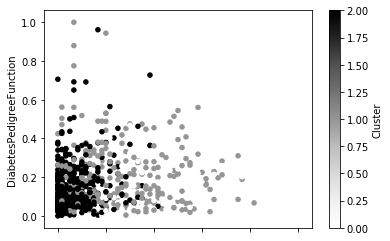

In [10]:
newdatasets.plot.scatter(x='Age', y='DiabetesPedigreeFunction', c='Cluster')

In [11]:
cents = pd.DataFrame(columns=diabetescol,data=sometup[1])
cents.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.409467,0.594731,0.619685,0.152541,0.047734,0.455733,0.141162,0.437240,0.0
1,0.286216,0.709836,0.580530,0.223881,0.118600,0.523734,0.201751,0.267786,1.0
2,0.119861,0.538188,0.537965,0.214484,0.092869,0.450215,0.153290,0.077823,0.0


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.409467  0.594731       0.619685       0.152541  0.047734  0.455733   
1     0.286216  0.709836       0.580530       0.223881  0.118600  0.523734   
2     0.119861  0.538188       0.537965       0.214484  0.092869  0.450215   

   DiabetesPedigreeFunction       Age  Outcome  color  
0                  0.141162  0.437240      0.0      1  
1                  0.201751  0.267786      1.0      2  
2                  0.153290  0.077823      0.0      3  


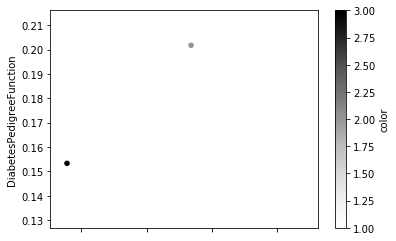

In [12]:
cents['color']=[1,2,3]
print(cents.head())
cents.plot.scatter(x='Age', y='DiabetesPedigreeFunction', c='color')

## Mushrooms

In [13]:
#Import dataset
iris=pd.read_csv('../data/external/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
#Due to all of the differing scales and the statistics between k-means, must normalize the interesting data
#Source: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
iris=iris.drop(columns={'Id','Species'})
iriscol=list(iris)
data=iris.values
min_max_scaler = pr.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
iris = pd.DataFrame(columns=iriscol,data=x_scaled)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


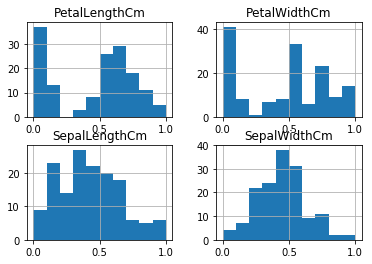

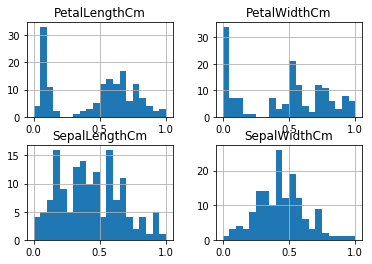

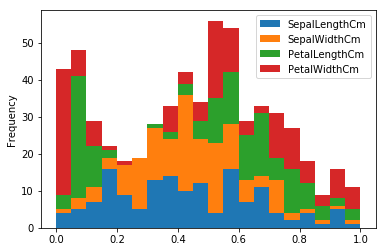

In [16]:
#Implement quick histogram to better understand limit balance
iris.hist(bins=10)
iris.hist(bins=20)
#focus=diabetes.loc[:,['BMI', 'DiabetesPedigreeFunction','Glucose','BloodPressure']]
iris.plot.hist(stacked=True,bins=20)

In [17]:
checknum=iris.values
k=3
sometup=kmean(checknum, k)
newcol=['Cluster'] + iriscol
newdatasets = pd.DataFrame(columns=newcol,data=sometup[0])
newdatasets.head()

----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----
----ASSIGN----
----UPDATE----


,Cluster,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,2.0,0.222222,0.625000,0.067797,0.041667
1,2.0,0.166667,0.416667,0.067797,0.041667
2,2.0,0.111111,0.500000,0.050847,0.041667
3,2.0,0.083333,0.458333,0.084746,0.041667
4,2.0,0.194444,0.666667,0.067797,0.041667


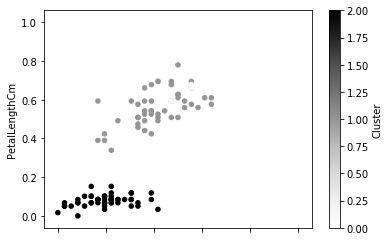

In [18]:
newdatasets.plot.scatter(x='SepalLengthCm', y='PetalLengthCm', c='Cluster')

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  color
0       0.667735      0.443109       0.757171      0.782051      1
1       0.412037      0.276910       0.558969      0.520833      2
2       0.196111      0.590833       0.078644      0.060000      3


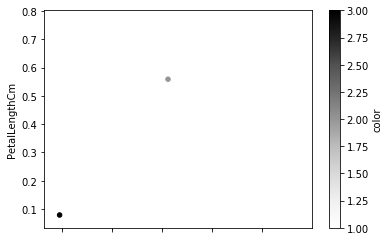

In [20]:
cents = pd.DataFrame(columns=iriscol,data=sometup[1])
cents['color']=[1,2,3]
print(cents.head())
cents.plot.scatter(x='SepalLengthCm', y='PetalLengthCm', c='color')